In [34]:
# Importing the required libraries
import os
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset, random_split
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
# Setting the random seed for reproducibility
random_seed = 42
torch.manual_seed(random_seed)

# Defining the batch size, available GPUs, and number of workers
BATCH_SIZE=32
AVAIL_GPUS = min(1, torch.cuda.device_count())
NUM_WORKERS=int(os.cpu_count() / 2)

This block of code imports various libraries required for building a deep learning model using PyTorch. It also sets the random seed to 42 for reproducibility of results.

Furthermore, it defines the batch size for the data loader, the number of available GPUs, and the number of workers for the data loader to use.
***

In [35]:
torch.cuda.is_available()
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [36]:
# Define CustomDataset class
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.FFT_files = os.listdir(root_dir)
        self.transform = transform

    def __len__(self):
        return len(self.FFT_files)

    def __getitem__(self, idx):
        file_name=self.FFT_files[idx]
        FFT_path = os.path.join(self.root_dir, file_name)
        FFT =  (10**7)*pd.read_csv(FFT_path,header=None).values
        FFT_tensor = torch.tensor(FFT, dtype=torch.float32)
        FFT_tensor = FFT_tensor.view(-1, FFT_tensor.shape[1])
        Label_Tag=file_name.split('_')
        label=[]
        for n in [1,3,5,7,9,11,13]:
            temp_num=float(Label_Tag[n])
            label.append(temp_num)
        label=torch.tensor(label)
    
        return FFT_tensor, label

In [37]:
# Setting the root directory of the dataset
root_dir = '../Data/FFT_Data/Turn_off'

# Defining the transformations for the dataset using PyTorch's Compose function
transformations = transforms.Compose([
    transforms.Normalize,
])

# Creating a custom dataset and dataloader using the CustomDataModule class
dataset = CustomDataset(root_dir)
DataLoader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle= True)

In [38]:
# Set up the data module and data loader
i, l = next(iter(DataLoader))
# Printing the shape of the input data and labels
print(i.shape)
print(l.shape)

torch.Size([32, 3, 981])
torch.Size([32, 7])


### Generator

In [39]:
## A generator model that takes a latent space vector as input and outputs a wavelet image

## TODO: 
# Input_size [batch,7]
# End_size [batch, 3, 981]
# size history [7] > [64] > [488] [3,490] > [3, 981]
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        # Define the layers of the generator
        self.lin1 = nn.Linear(7, 64)
        self.lin2 = nn.Linear(64, 128) 
        self.lin3 = nn.Linear(128,256)
        self.lin4 = nn.Linear(256, 488)
        self.lin5 = nn.Linear(488, 981)
        self.lin6 = nn.Linear(981, 981 *3)
    

    def forward(self, x):
        # Pass the input through a linear layer and reshape
        batch_size=x.shape[0]
        x = self.lin1(x)
        x = F.relu(x)

        x = self.lin2(x)
        x = F.relu(x)

        x = self.lin3(x)
        x = F.relu(x)

        x = self.lin4(x)
        x = F.relu(x)

        x = self.lin5(x)
        x = F.relu(x)

        x = self.lin6(x)

        x=x.view(batch_size,3,-1)      

        return x

### Encoder

In [40]:
model = Generator().to(device=DEVICE)
criterion =nn.MSELoss()
optimier = torch.optim.Adam(model.parameters(),lr=0.001)
num_epochs = 50

Traing Step

  0%|          | 0/50 [00:00<?, ?it/s]

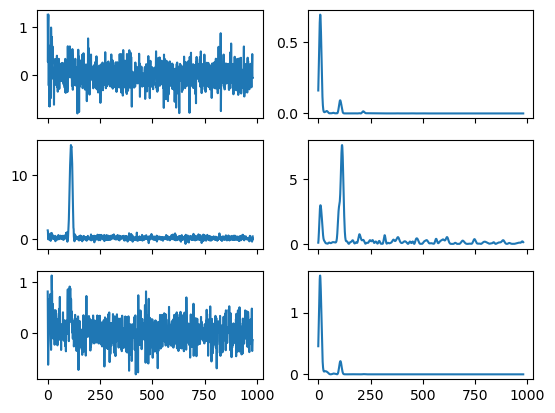

  2%|▏         | 1/50 [00:09<08:00,  9.80s/it]

Epoch [1/50], Loss: 1.8713536263


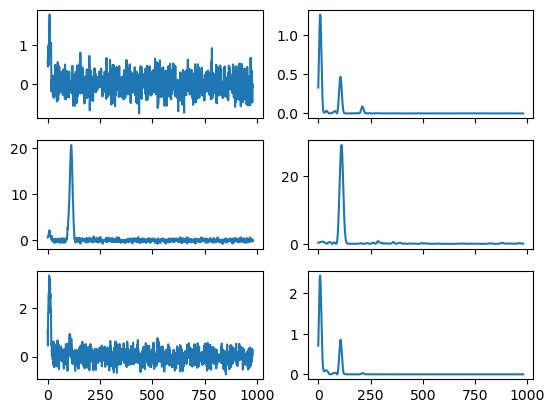

  4%|▍         | 2/50 [00:18<07:16,  9.09s/it]

Epoch [2/50], Loss: 0.8382971287


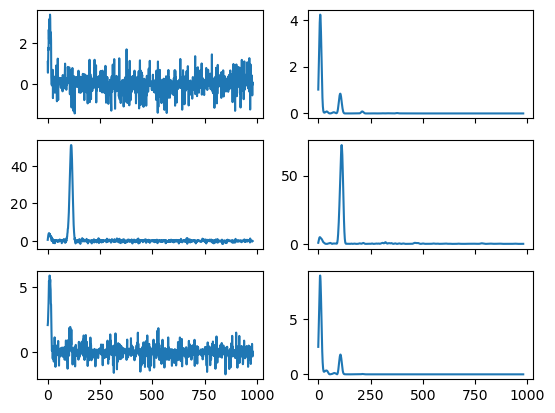

  6%|▌         | 3/50 [00:26<06:49,  8.72s/it]

Epoch [3/50], Loss: 1.0020344257


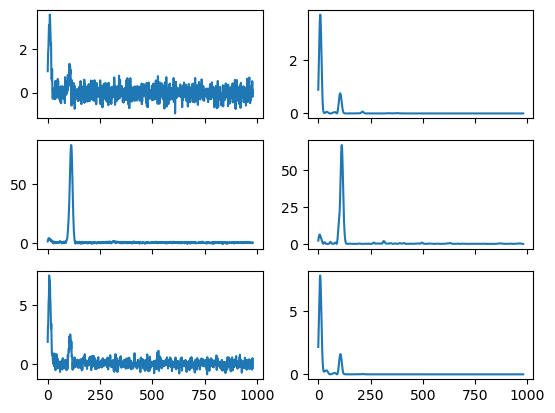

  8%|▊         | 4/50 [00:34<06:32,  8.53s/it]

Epoch [4/50], Loss: 0.5239343643


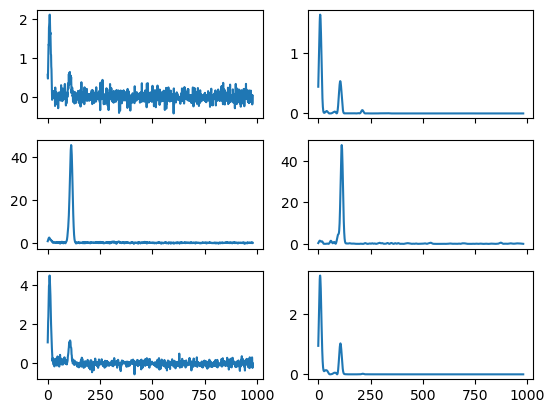

 10%|█         | 5/50 [00:43<06:22,  8.50s/it]

Epoch [5/50], Loss: 0.2876196802


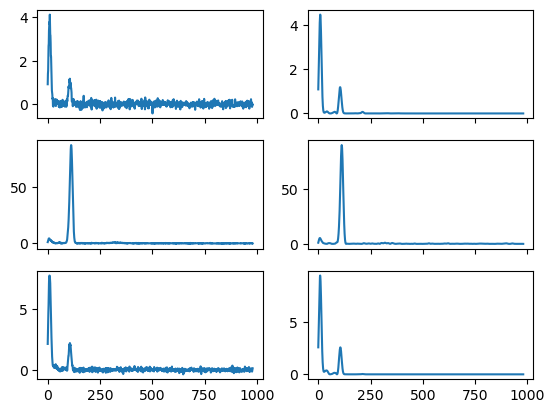

 12%|█▏        | 6/50 [00:51<06:09,  8.41s/it]

Epoch [6/50], Loss: 0.3872549832


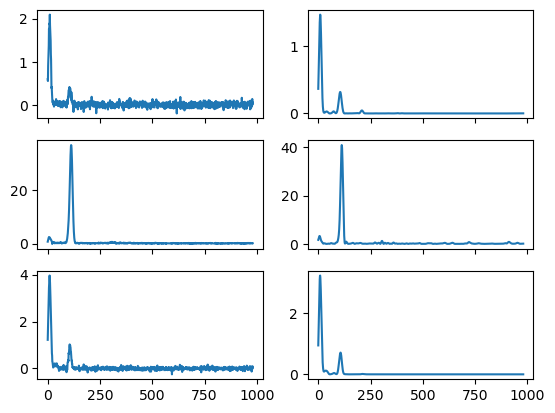

 14%|█▍        | 7/50 [00:59<06:00,  8.37s/it]

Epoch [7/50], Loss: 0.0839590952


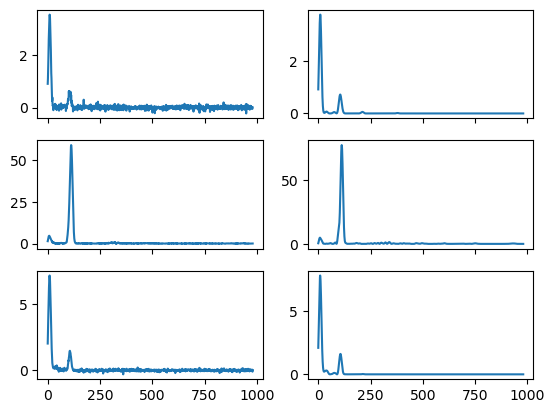

 16%|█▌        | 8/50 [01:08<05:50,  8.34s/it]

Epoch [8/50], Loss: 0.2070755810


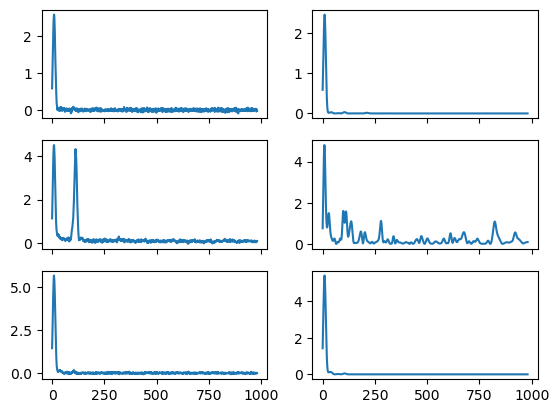

 18%|█▊        | 9/50 [01:16<05:42,  8.35s/it]

Epoch [9/50], Loss: 0.2248698622


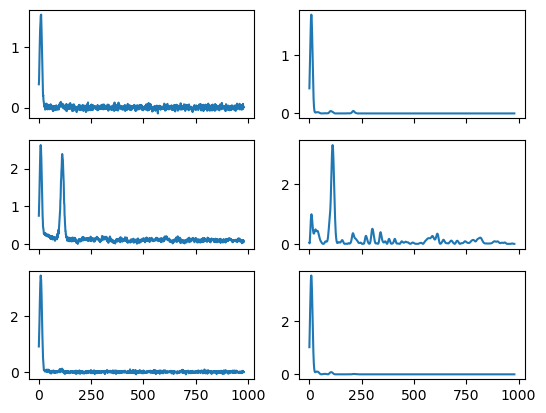

 20%|██        | 10/50 [01:24<05:32,  8.30s/it]

Epoch [10/50], Loss: 0.0590115525


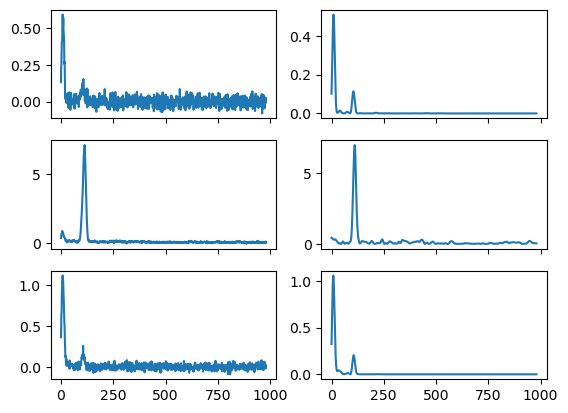

 22%|██▏       | 11/50 [01:33<05:25,  8.33s/it]

Epoch [11/50], Loss: 0.0851739496


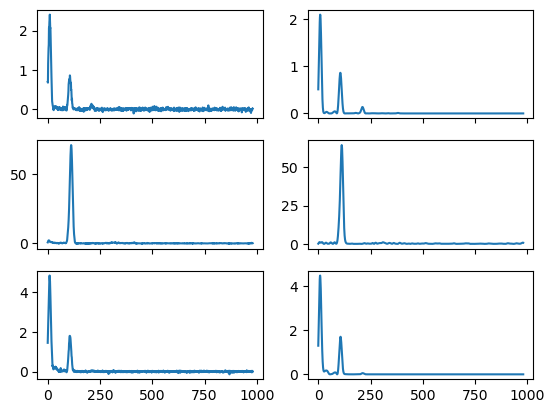

 24%|██▍       | 12/50 [01:41<05:17,  8.36s/it]

Epoch [12/50], Loss: 0.1706148386


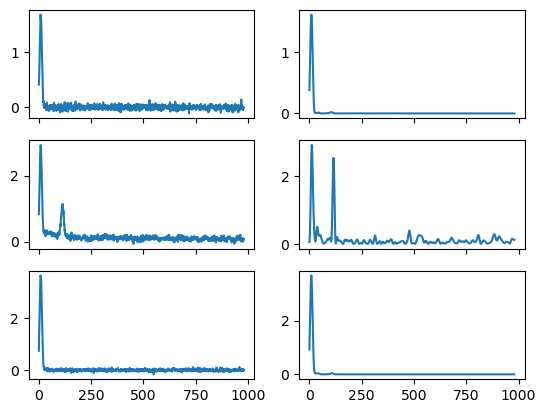

 26%|██▌       | 13/50 [01:49<05:08,  8.33s/it]

Epoch [13/50], Loss: 0.0563902818


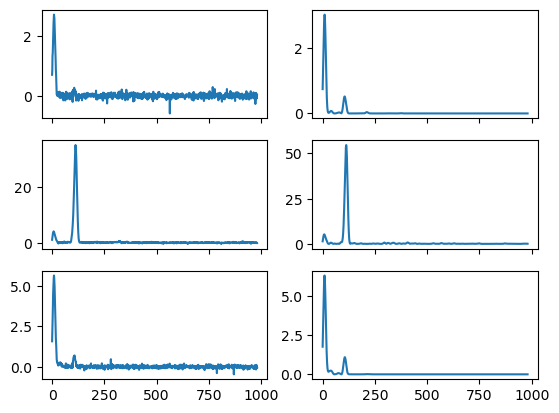

 28%|██▊       | 14/50 [01:58<05:01,  8.37s/it]

Epoch [14/50], Loss: 1.2917693853


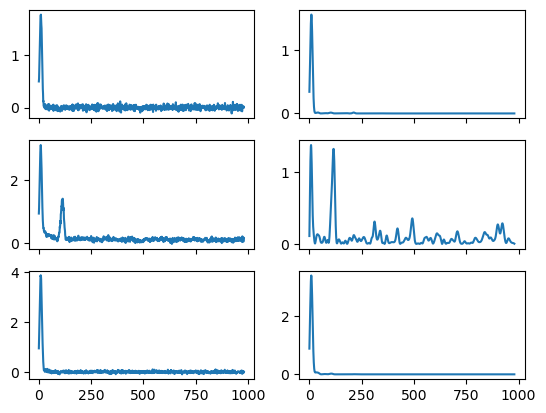

 30%|███       | 15/50 [02:06<04:51,  8.33s/it]

Epoch [15/50], Loss: 0.2383085936


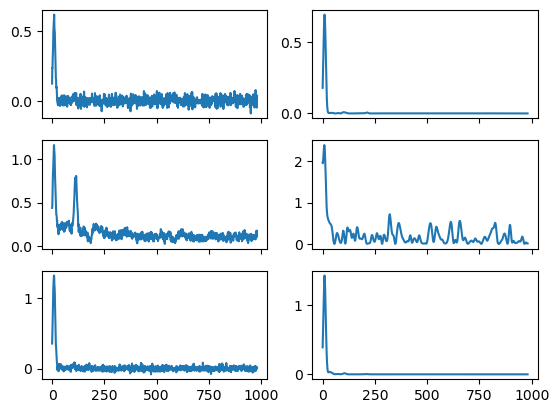

 32%|███▏      | 16/50 [02:14<04:42,  8.31s/it]

Epoch [16/50], Loss: 0.1390963346


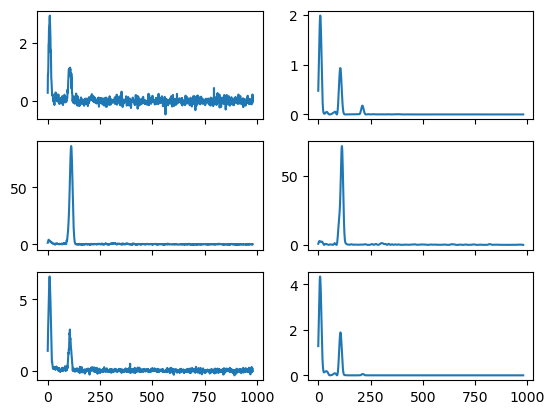

 34%|███▍      | 17/50 [02:22<04:33,  8.27s/it]

Epoch [17/50], Loss: 0.2326306254


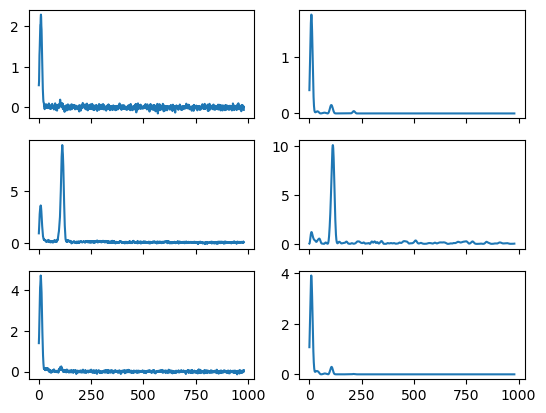

 36%|███▌      | 18/50 [02:31<04:26,  8.32s/it]

Epoch [18/50], Loss: 0.1132544056


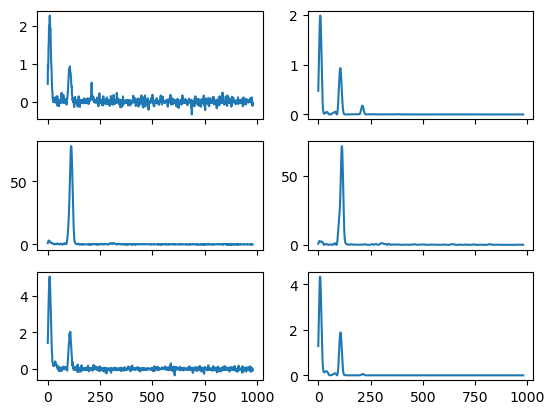

 38%|███▊      | 19/50 [02:39<04:18,  8.33s/it]

Epoch [19/50], Loss: 0.2021264434


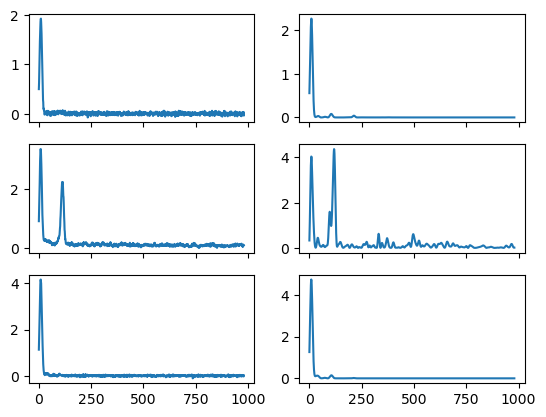

 40%|████      | 20/50 [02:48<04:10,  8.36s/it]

Epoch [20/50], Loss: 0.0789162666


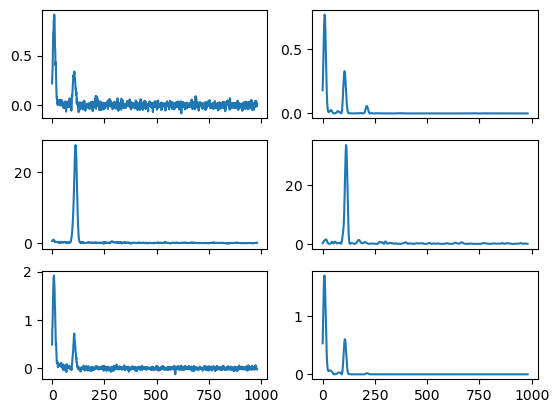

 42%|████▏     | 21/50 [02:56<04:03,  8.38s/it]

Epoch [21/50], Loss: 0.1452854425


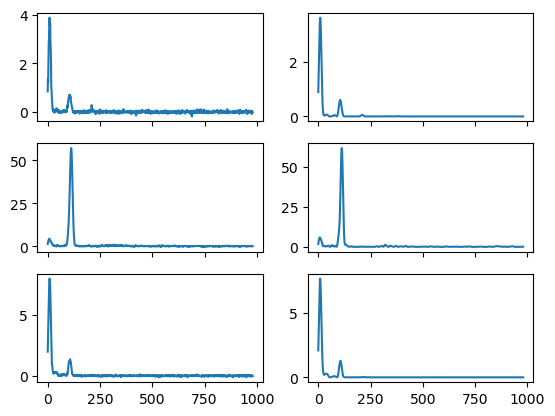

 44%|████▍     | 22/50 [03:04<03:54,  8.38s/it]

Epoch [22/50], Loss: 0.0551956035


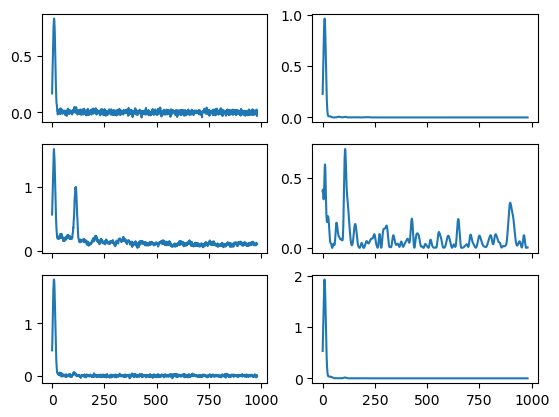

 46%|████▌     | 23/50 [03:13<03:46,  8.37s/it]

Epoch [23/50], Loss: 0.1652423590


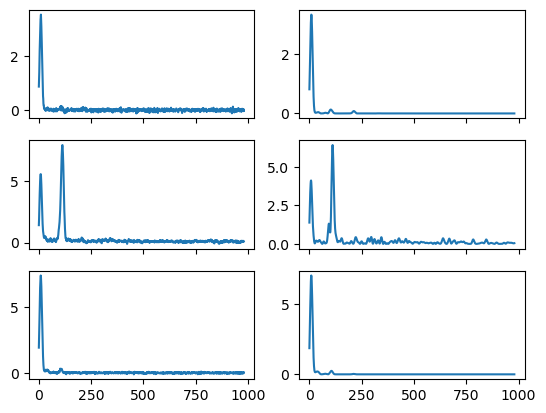

 48%|████▊     | 24/50 [03:21<03:38,  8.40s/it]

Epoch [24/50], Loss: 0.1912615448


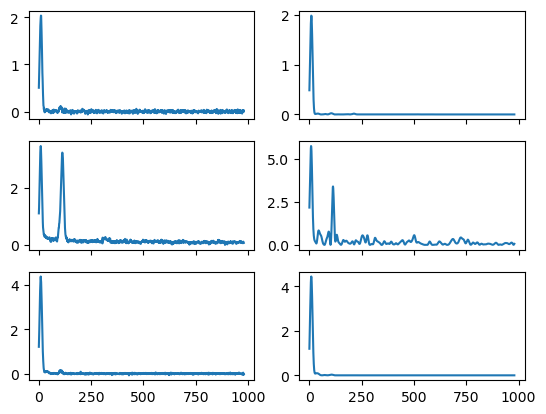

 50%|█████     | 25/50 [03:30<03:29,  8.39s/it]

Epoch [25/50], Loss: 0.0785354897


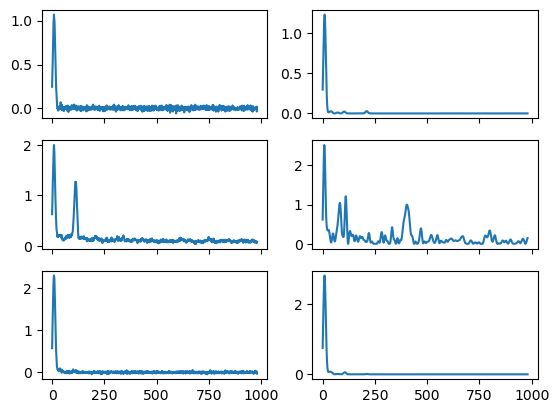

 52%|█████▏    | 26/50 [03:38<03:20,  8.37s/it]

Epoch [26/50], Loss: 0.1852250397


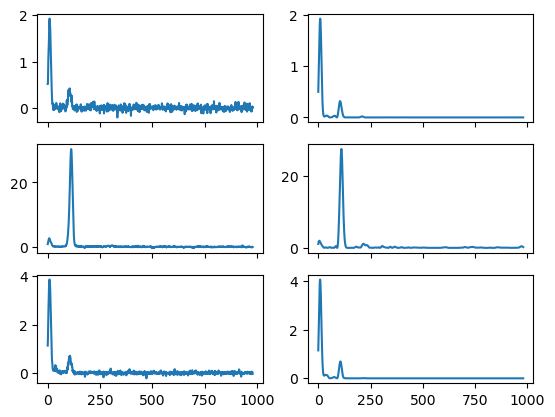

 54%|█████▍    | 27/50 [03:46<03:12,  8.37s/it]

Epoch [27/50], Loss: 0.0436620899


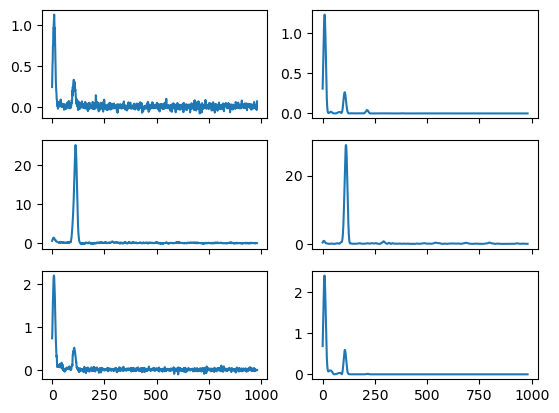

 56%|█████▌    | 28/50 [03:55<03:03,  8.35s/it]

Epoch [28/50], Loss: 0.0921593904


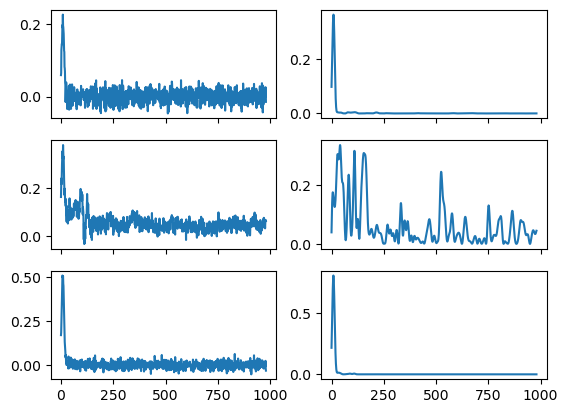

 58%|█████▊    | 29/50 [04:03<02:55,  8.35s/it]

Epoch [29/50], Loss: 0.1701124907


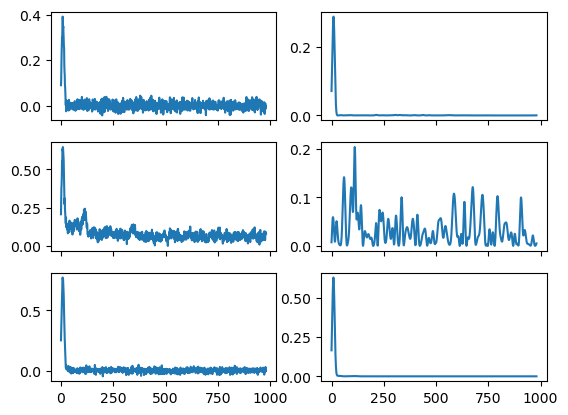

 60%|██████    | 30/50 [04:11<02:47,  8.37s/it]

Epoch [30/50], Loss: 0.0886054710


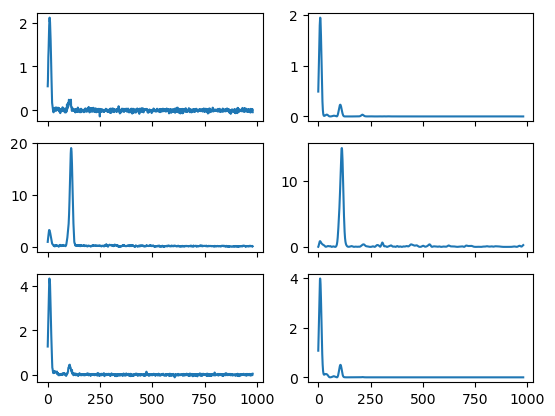

 62%|██████▏   | 31/50 [04:20<02:38,  8.37s/it]

Epoch [31/50], Loss: 0.0366719700


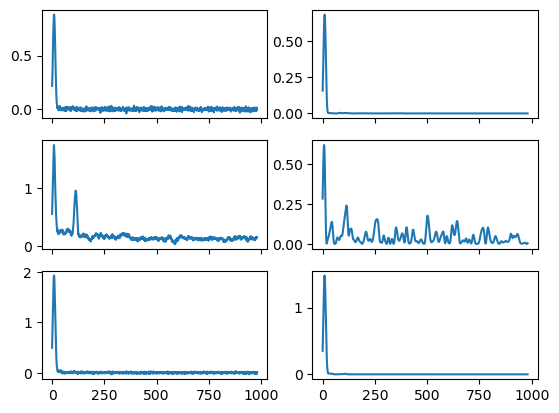

 64%|██████▍   | 32/50 [04:28<02:30,  8.37s/it]

Epoch [32/50], Loss: 0.0973190144


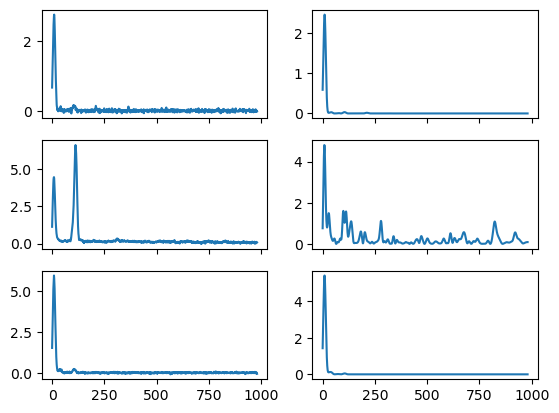

 66%|██████▌   | 33/50 [04:36<02:22,  8.36s/it]

Epoch [33/50], Loss: 0.0923638791


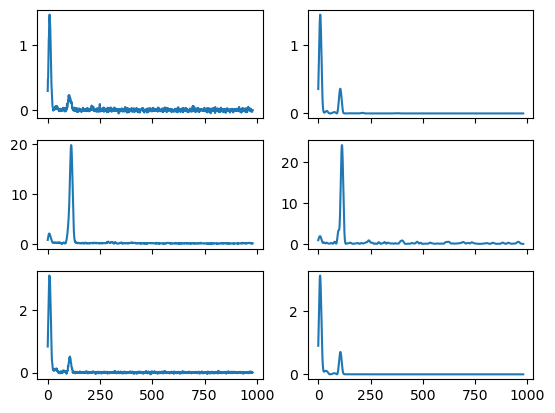

 68%|██████▊   | 34/50 [04:45<02:14,  8.38s/it]

Epoch [34/50], Loss: 0.2555449307


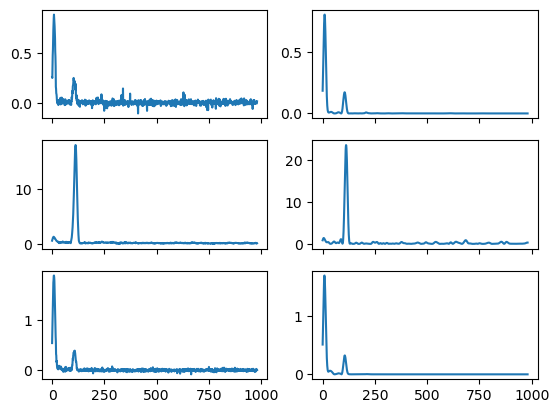

 70%|███████   | 35/50 [04:53<02:05,  8.35s/it]

Epoch [35/50], Loss: 0.0566779785


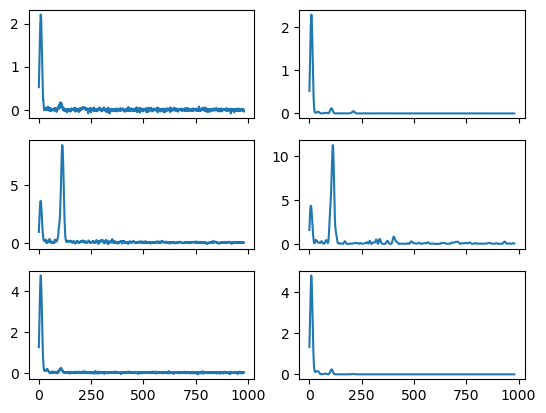

 72%|███████▏  | 36/50 [05:02<01:57,  8.40s/it]

Epoch [36/50], Loss: 0.1977639943


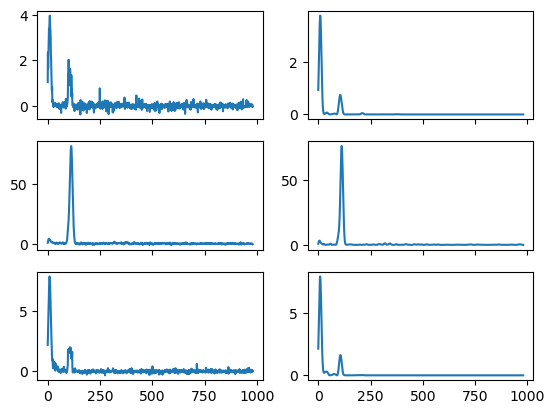

 74%|███████▍  | 37/50 [05:10<01:48,  8.34s/it]

Epoch [37/50], Loss: 0.0489991419


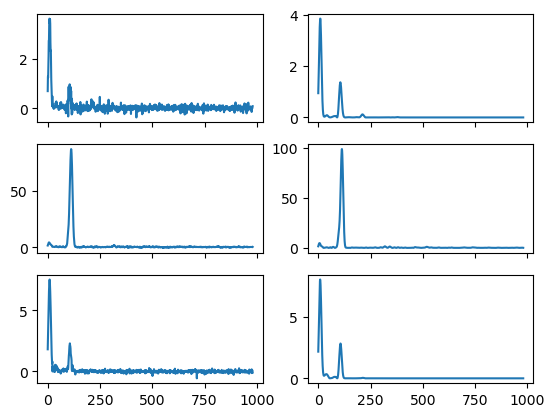

 76%|███████▌  | 38/50 [05:18<01:40,  8.39s/it]

Epoch [38/50], Loss: 0.5962762237


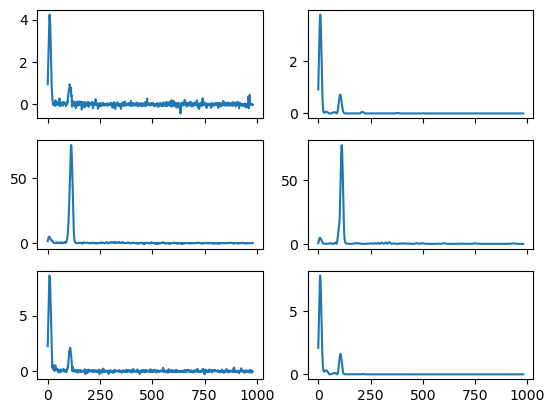

 78%|███████▊  | 39/50 [05:27<01:33,  8.46s/it]

Epoch [39/50], Loss: 0.1457545906


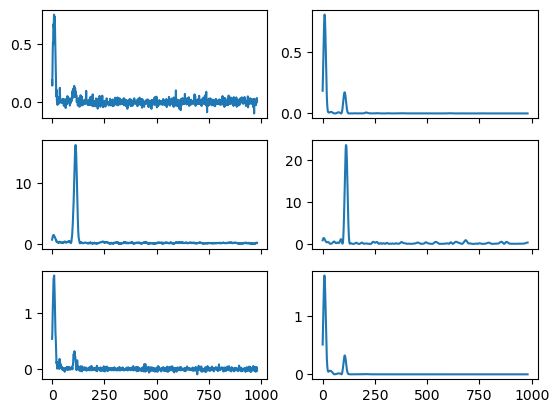

 80%|████████  | 40/50 [05:36<01:24,  8.49s/it]

Epoch [40/50], Loss: 0.0653094947


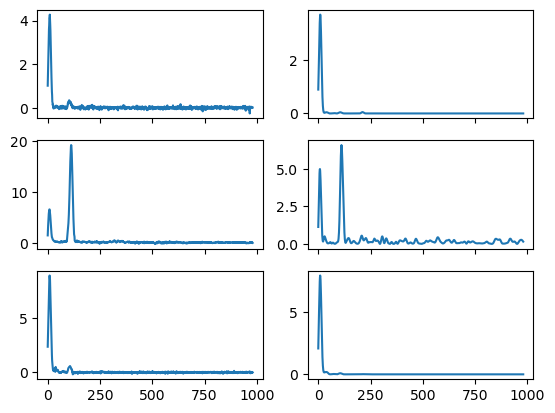

 82%|████████▏ | 41/50 [05:44<01:16,  8.54s/it]

Epoch [41/50], Loss: 0.0365626626


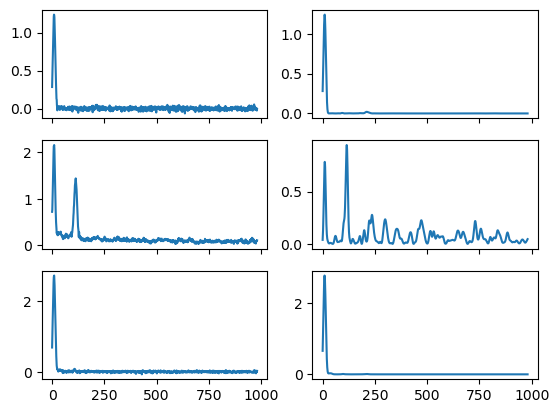

 84%|████████▍ | 42/50 [05:53<01:08,  8.52s/it]

Epoch [42/50], Loss: 0.1871563196


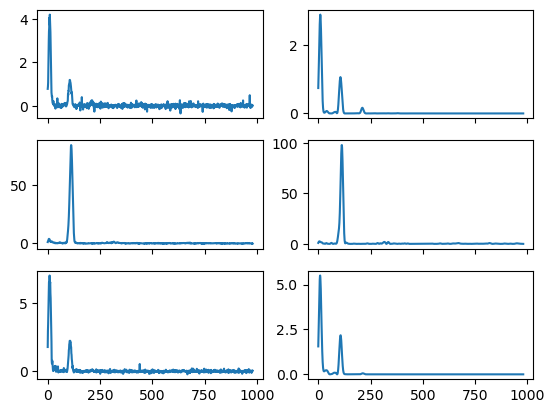

 86%|████████▌ | 43/50 [06:01<00:59,  8.50s/it]

Epoch [43/50], Loss: 0.2211930752


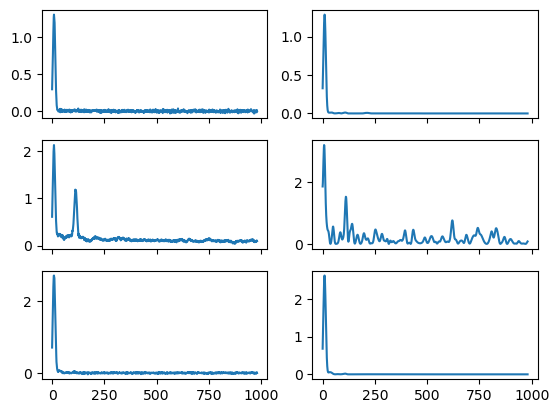

 88%|████████▊ | 44/50 [06:10<00:50,  8.46s/it]

Epoch [44/50], Loss: 0.2038155794


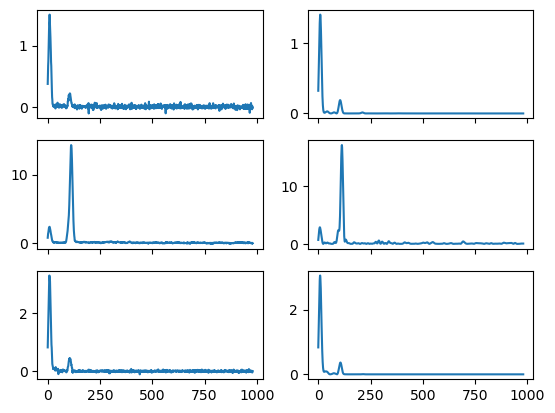

 90%|█████████ | 45/50 [06:18<00:42,  8.43s/it]

Epoch [45/50], Loss: 0.1678034365


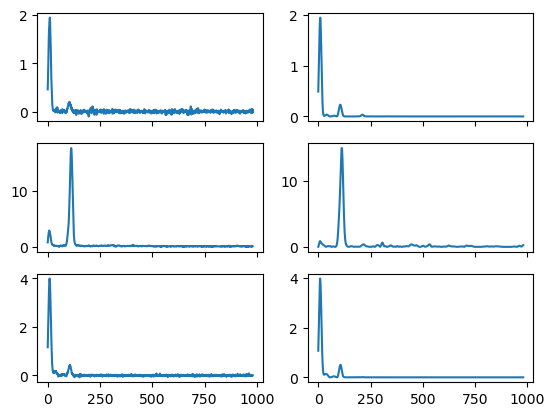

 92%|█████████▏| 46/50 [06:27<00:33,  8.48s/it]

Epoch [46/50], Loss: 0.2426047176


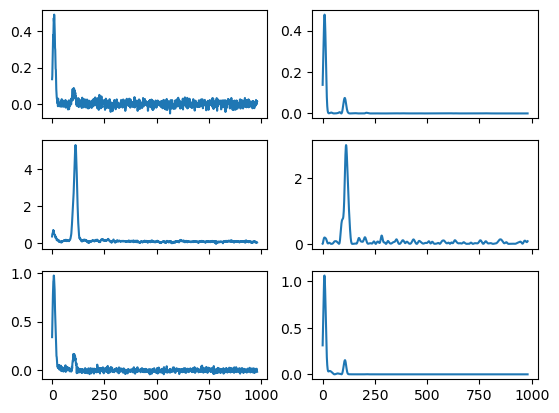

 94%|█████████▍| 47/50 [06:35<00:25,  8.50s/it]

Epoch [47/50], Loss: 0.1487103552


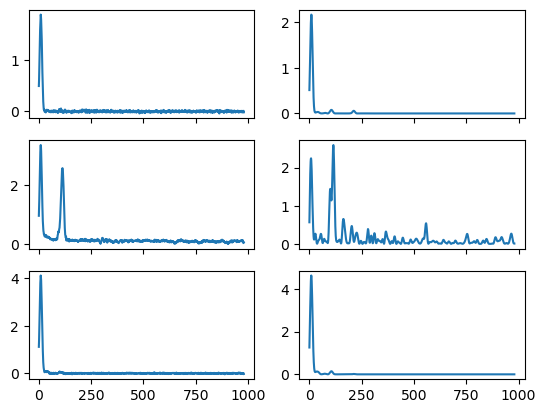

 96%|█████████▌| 48/50 [06:43<00:16,  8.45s/it]

Epoch [48/50], Loss: 0.1758285463


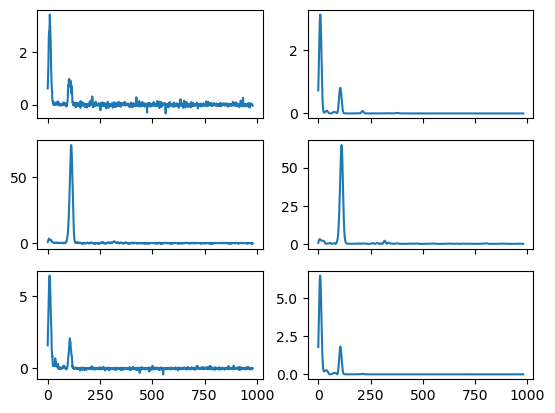

 98%|█████████▊| 49/50 [06:52<00:08,  8.44s/it]

Epoch [49/50], Loss: 0.1959278733


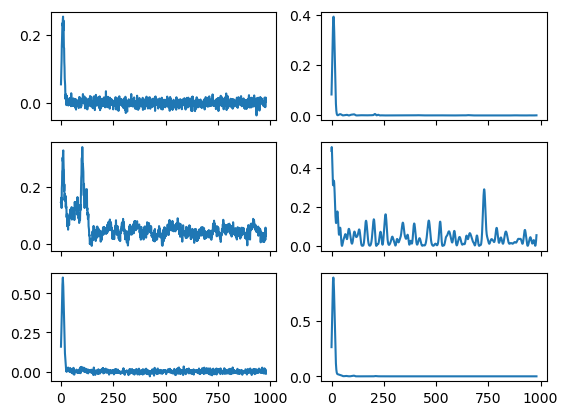

100%|██████████| 50/50 [07:00<00:00,  8.41s/it]

Epoch [50/50], Loss: 0.1391354352
Train Finish


In [41]:
for epoch in tqdm(range(num_epochs)):
    model.train()
    for Data in DataLoader:
        real_data, label = Data
        real_data=real_data.to(DEVICE)
        label = label.to(DEVICE)
        
        Gen_data = model(label)

        loss = criterion(Gen_data, real_data)
        optimier.zero_grad()
        loss.backward()
        optimier.step()
    
    model.eval()
    with torch.no_grad():
        for data in DataLoader:
            Test_data, Test_label = Data
            Test_label = Test_label.to(DEVICE)
            
            Test= model(Test_label)
            Test= Test.to('cpu')
            fig, axes= plt.subplots(3,2,sharex=True)
            Id=Test[0,0,:]
            Vds=Test[0,1,:]
            Vgs=Test[0,2,:]
            axes[0,0].plot(Id)
            axes[1,0].plot(Vds)
            axes[2,0].plot(Vgs)
            axes[0,1].plot(Test_data[0,0,:])
            axes[1,1].plot(Test_data[0,1,:])
            axes[2,1].plot(Test_data[0,2,:])
            plt.show()
            break

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.10f}')

print("Train Finish")

Generator File export

In [ ]:
save_result_path="../Data/Gan_Data/FFT/"

Result_data ,Generator_label = next(iter(DataLoader))
model.eval()

with torch.no_grad():
    Generator_label=Generator_label.to(DEVICE)
    Generator_Data=model(Generator_label)


Result=Generator_Data.cpu().detach().numpy()
batch=Result.shape[0]
Result=Result.reshape(batch * 3 , -1)
Result= pd.DataFrame(Result,index=None)
save_result= save_result_path + 'Result.csv'
Result.to_csv(save_result,header=False,index=False)

Original_data = Result_data.cpu().detach().numpy()
Original_data = Original_data.reshape(batch * 3 , -1)
Original_data= pd.DataFrame(Original_data,index= None)
Original_data_path = save_result_path + 'Original.csv'
Original_data.to_csv(Original_data_path,header=False,index=False)
